<a href="https://colab.research.google.com/github/Ester-Taniya/DI-Bootcamp/blob/main/Week4/Day5/Mini_Project_1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('survey.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#1
What is the distribution of mental health conditions among different age groups in the tech industry?
we can't answer, cause don't have a column with information about mental hels disease names, but can show histogram by age

 fistful  make some data cleaningning :

This study can determine how mental health problems are distributed in the tech industry in different countries. So, it possible to remove some columns not-relate to the study:
- 'State' (before chacked fulnes colummn 'Country'/ not missed data)
- 'family_history' (no give answers to mental helsh)
- 'no_employees' (no related to mental helsh)
- 'leave' (no mater)

- 'benefits' (no given correlation to mental helsh )
- 'phys_health_consequence'(no interesting )
- 'coworkers'(no give relate information)
- 'supervisor' (no give relate information)
- 'phys_health_interview' (no interesting )
- 'mental_vs_physical' (no give relate information)
- 'obs_consequence' (no give relate information)




In [ ]:
df['Country'].unique()



array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [ ]:
df.drop(columns=['state', 'family_history', 'no_employees',  'benefits', 'leave','phys_health_consequence','coworkers', 'supervisor', 'phys_health_interview' ,'mental_vs_physical','obs_consequence'], inplace=True)


In [ ]:
df['tech_company'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# drop rows not tech workers
df = df[df['tech_company'] != 'No']

In [ ]:
df.drop(columns=['tech_company'], inplace=True)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male', 'M', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'Mal', 'Male (CIS)', 'f', 'queer/she/they',
       'non-binary', 'Femake', 'Make', 'Nah', 'All', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'male leaning androgynous', 'Male ', 'Man', 'msle',
       'Female (trans)', 'queer', 'Female (cis)', 'Mail', 'cis male',
       'A little about you', 'Malr', 'p', 'Cis Man'], dtype=object)

In [ ]:
df['Gender'].replace(
    to_replace=['Male', 'male', 'M', 'm', 'Male ','Male', 'Guy (-ish) ^_^','Man','Malr', 'Male-ish','msle','Mail','Mal','maile','Malr','Make'],
    value='Male',inplace=True)

In [ ]:
df['Gender'].replace(
    to_replace=['Female', 'F', 'female', 'f','Woman','Femake', 'woman','femail','Female '],
    value='Female',inplace=True)

In [ ]:
filtered_df = (df['Gender'] != 'Male') & (df['Gender'] != 'Female')
df.loc[filtered_df, 'Gender'] = 'Other'

In [ ]:
df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
# cheack age array
df['Age'].sort_values().unique()


array([         -1,           5,           8,          11,          18,
                19,          20,          21,          22,          23,
                24,          25,          26,          27,          28,
                29,          30,          31,          32,          33,
                34,          35,          36,          37,          38,
                39,          40,          41,          42,          43,
                44,          45,          46,          47,          48,
                49,          50,          51,          53,          54,
                55,          56,          57,          58,          60,
                61,          62,         329, 99999999999])

In [ ]:
# df without age non range (18,62)
df=df[(df['Age'] > 17) & (df['Age'] < 63)]

In [ ]:
df

,Timestamp,Age,Gender,Country,self_employed,treatment,work_interfere,remote_work,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,mental_health_interview,comments
0,2014-08-27 11:29:31,37,Female,United States,NaN,Yes,Often,No,Not sure,No,Yes,Yes,No,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,Rarely,No,No,No,No,Don't know,No,Yes,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,Yes,Often,No,Yes,No,No,No,Yes,Maybe,NaN
4,2014-08-27 11:30:22,31,Male,United States,NaN,No,Never,Yes,No,Don't know,Don't know,Don't know,No,Yes,NaN
5,2014-08-27 11:31:22,33,Male,United States,NaN,No,Sometimes,No,Not sure,No,Don't know,Don't know,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2015-08-20 16:52:09,29,Male,United States,No,Yes,Sometimes,Yes,Yes,Yes,No,Yes,Yes,No,NaN
1254,2015-09-12 11:17:21,26,Male,United Kingdom,No,Yes,NaN,No,No,No,No,Don't know,No,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,No,Yes,Often,Yes,Yes,No,No,Yes,No,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,No,Yes,Sometimes,No,Yes,No,No,Don't know,Yes,No,NaN


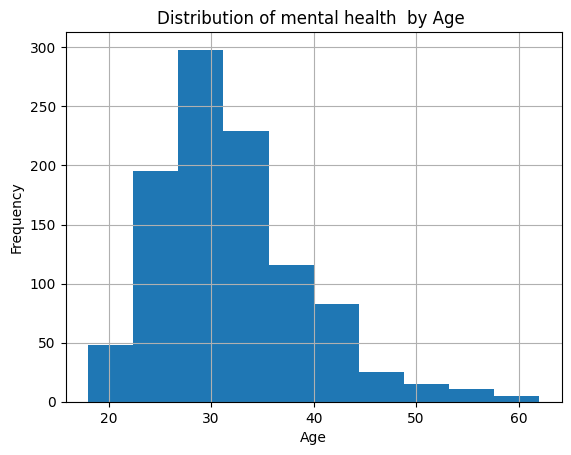

In [ ]:
# 1 histogram distribution of mental health conditions by age
import matplotlib.pyplot as plt
df['Age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of mental health  by Age ')
plt.show()

In [ ]:
# 2 frequency of mental health issues vary by gender
#(make 2 hist )
df['Gender'].value_counts()

Male      819
Female    186
Other      20
Name: Gender, dtype: int64

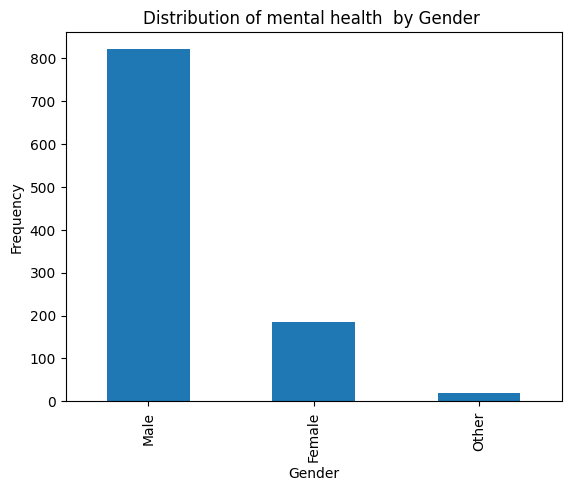

In [ ]:
# 2.1 histogram of mental health issues  by gender
import matplotlib.pyplot as plt

df['Gender'].value_counts().plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of mental health  by Gender ')
plt.show()


In [ ]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

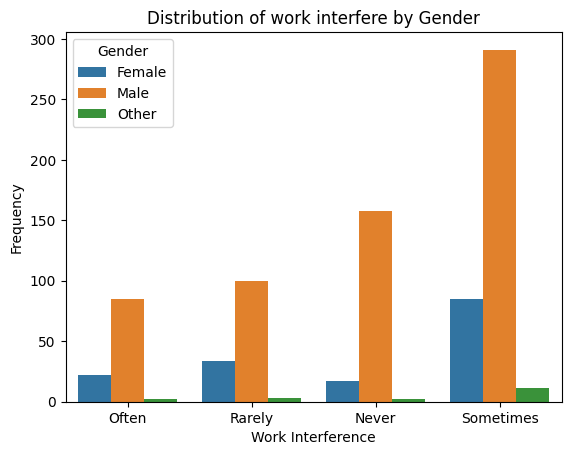

In [110]:
# 2.2 histogram work interfere issues by gender
import matplotlib.pyplot as plt
import seaborn as sns
# checkack and drop none values in 'work_interfere' column
df_filtered = df.dropna(subset=['work_interfere'])

sns.countplot(x='work_interfere', hue='Gender', data=df_filtered)

plt.title("Distribution of work interfere by Gender")
plt.xlabel("Work Interference")
plt.ylabel("Frequency")
plt.legend(title='Gender')
plt.show()

#3 Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.

In [ ]:
# cheack none values in column 'Country'
df['Country'].unique()
# data included only tech industry workers (drop other rows before)


array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'New Zealand', 'Spain', 'Finland', 'Uruguay',
       'Israel', 'Bosnia and Herzegovina', 'Hungary', 'Singapore',
       'Japan', 'Nigeria', 'Croatia', 'Belgium', 'Norway', 'Thailand',
       'Denmark', 'Greece', 'Moldova', 'China', 'Czech Republic',
       'Philippines'], dtype=object)

In [ ]:
#Identify the count mental health issues in countries
df['Country'].value_counts()


United States             607
United Kingdom            139
Canada                     56
Germany                    40
Ireland                    26
Netherlands                25
Australia                  17
France                     12
India                       9
New Zealand                 7
Switzerland                 7
Poland                      7
Sweden                      7
Brazil                      6
Italy                       5
Israel                      4
South Africa                4
Bulgaria                    4
Singapore                   4
Belgium                     3
Austria                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Croatia                     2
Colombia                    2
Portugal                    2
Finland                     2
Uruguay                     1
Norway                      1
Czech Republic              1
China                       1
Moldova   

In [129]:
max_count = df['Country'].value_counts().max()
min_count = df['Country'].value_counts().min()


max_Country = df['Country'].value_counts()[df['Country'].value_counts() == max_count]

min_Country = df['Country'].value_counts()[df['Country'].value_counts() == min_count]


print("Countries with the maximum count:")
print(max_Country)

print("Countries with the minimum count:")
print(min_Country)


Countries with the maximum count:
United States    607
Name: Country, dtype: int64
Countries with the minimum count:
Uruguay                   1
Norway                    1
Czech Republic            1
China                     1
Moldova                   1
Slovenia                  1
Thailand                  1
Costa Rica                1
Latvia                    1
Nigeria                   1
Japan                     1
Spain                     1
Hungary                   1
Bosnia and Herzegovina    1
Philippines               1
Name: Country, dtype: int64
